In [51]:
# Importanto as bibliotecas utilizadas

import numpy as np
from numpy import linalg as la
from math import *
import matplotlib.pyplot as plt
import scipy

## 1) Decomposição em Valores Singulares (SVD)

### 1. a) Escreva um código implementando o método de Francis usando a função numpy.linalg.qr para obter as decomposições QR necessárias

In [52]:
def francis(A, k_max, tol):
    n  = A.shape[0]
    V = np.eye(n) 

    for k in range(k_max):

        # Aproximando as matrizes
        Q, R = la.qr(A)
        V = V @ Q
        A = R @ Q

        # Recalculando o erro
        if np.sum(np.abs(A - np.diag(np.diag(A)))) < tol:
            break
        
    D = np.diag(A)
    return D, V

O *Método de Francis*, em síntese, é utilizado para obter os auto-valores de uma matriz quadrada. Para isso, utiliza-se a técnica de *Decomposição QR*, que nos permite representar uma matriz quadrada $A$ como o produto $QR$ de duas matrizes.

A implementação acima, utiliza sucessivas *Decomposições QR* (assim como operações entre as matrizes $A$ e $V$ com as matrizes $Q$ e $R$) visando aproximar a matriz $A$ de uma forma diagonal, cujos elementos da diagonal principal representam os auto-valores da matriz. As colunas da matriz $V$ armazenam, consequentemente, os auto-vetores de $A$.

Por fim, o método segue um critério de parada, o qual visa identificar se a matriz já é suficientemente diagonal através da operação lógica $\text{off}(A) = \| A \|_F^2 - \sum_{i=1}^{n} a_{ii}^2 < \text{tol}$, em que **$\text{off(A)}$** é o erro calculado e **$\text{tol}$** o erro tolerado pelo método. Foi adicionado também um número máximo de iterações, uma vez que lidar com imagens pode significar um trabalho exaustivo do método ao operar com matrizes muito grandes, tornando inviável sua execução em ambiente *python*.

### 1. b) Usando a rotina implementada para o método de Francis, escreva um código que retorne a decomposição SVD de uma matriz qualquer $Am×n$.

In [53]:
def svd(A, k_max=100, epsilon=1e-8):
    m, n = A.shape

    # Calculando a matriz ATA (ou AAT), a depender da dimensionalidade da matriz de entrada
    if m >= n:
        ATA = A.T @ A
    else:
        ATA = A @ A.T

    # Decompondo a matriz calculada através do método de Francis
    D, V = francis(ATA, k_max, epsilon)

    # Obtendo as matrizes resultantes da decomposição SVD
    if m >= n:
        S = np.sqrt(np.abs(D))
        U = A @ V / S
    else:
        S = np.sqrt(np.abs(D))
        U = V
        V = A.T @ U / S

    return U, S, V.T

A *Decomposição SVD* de uma matriz é uma técnica utilizada para decompor uma matriz genérica no produto entre três matrizes *$U$, $\Sigma$ e $V$*, em que $U$ armazena os primeiros auto-vetores de $A$, $\Sigma$ é diagonal e contém os auto-valores de $A$ em sua diagonal principal, e $V$ armazena os últimos auto-vetores da matriz $A$.

A implementação acima se propõe a calcular a *Decomposição SVD* de uma matriz genérica, e portanto trata o caso em que o número de linhas é maior que o de colunas e vice e versa. Inicialmente, são obtidas as dimensões de $A$ e calcula-se a matriz $ATA$ (ou $AAT$, caso o número de colunas seja maior que o de linhas), utilizada em cálculos posteriores. Em seguida, obtém-se os auto-valores e auto-vetores da matriz recém calculada através do *Método de Francis* (implementado no item a).

Finalmente, os dados recém obtidos são utilizados para calcular as matrizes da *Decomposição SVD*.

### 1. c) Podemos armazenar uma imagem em uma matriz $Am×n$. Toda imagem consiste em um conjunto de pixels que são os blocos de construção dessa imagem. Cada pixel representa a cor ou a intensidade da luz em um local específico na imagem. Em uma imagem em escala de cinza em formato PNG, cada pixel tem um valor entre 0 e 1, em que 0 corresponde ao preto e 1 corresponde ao branco. Assim, uma imagem em escala de cinza com $m×n$ pixels pode ser armazenada em uma matriz $m×n$ com valores entre 0 e 1. Use a função imread() da biblioteca Matplotlib do Python para carregar a imagem *cat.png* em escala de cinza. Depois, use as decomposições SVD *numpy.linalg.svd* e a implementada no ítem 2) para comprimir a imagem, representando-a por *k (k < min{m, n})* valores singulares, isto é, troque a matriz $A$ por $Ak = U[:, : k] ∗ Σ[: k, : k] ∗ V T[: k, :]$. Plote a imagem original e a imagem 50% e 70% comprimida e compare os resultados. Para tal, use a função imshow(), também da biblioteca Matplotlib.

In [54]:
# Converte uma imagem em RGB para escala de cinza
def rgb_to_greyscale(image):
    return np.dot(image[...,:3], [0.299, 0.587, 0.144])

# Converte uma imagem em escala [0, 255] para [0, 1] 
def image_to_double(image):
    max_val = np.amax(image)
    min_val = np.amin(image)

    return (image.astype(float) - min_val) / (max_val - min_val)

In [55]:
# Lendo a imagem e realizando as devidas conversões
img = rgb_to_greyscale(plt.imread('cat.png'))
img = image_to_double(img)

# Obtendo os dados de dimensionalidade para o SVD
m, n = img.shape
k_original = min(m, n)

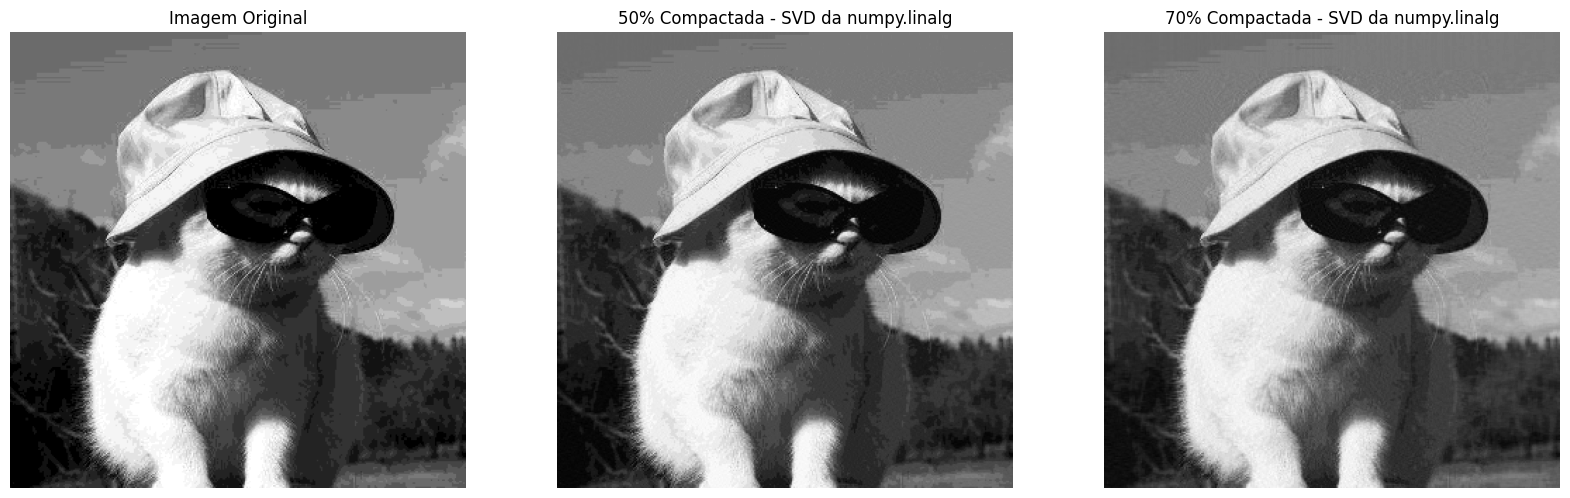

In [56]:
fig = plt.figure(figsize=(20,6),facecolor='white')

# Plotando a imagem original
fig.add_subplot(1, 3, 1)
plt.imshow(img, cmap='grey')
plt.title('Imagem Original')
plt.axis('off')

# Aplicando a decomposição SVD (da biblioteca numpy.linalg) na imagem
U, S, V = la.svd(img)
S = np.diag(S)

# Compactando a imagem em 50%
k = int(k_original * 0.50)
img_compact = U[:, :k] @ S[:k, :k] @ V[:k, :]

# Imprimindo a imagem 50% compactada
fig.add_subplot(1, 3, 2)
plt.imshow(img_compact, cmap='grey')
plt.title('50% Compactada - SVD da numpy.linalg')
plt.axis('off')

# Compactando a imagem em 70%
k = int(k_original * 0.30)
img_compact = U[:, :k] @ S[:k, :k] @ V[:k, :]

# Imprimindo a imagem compactada
fig.add_subplot(1, 3, 3)
plt.imshow(img_compact, cmap='grey')
plt.title('70% Compactada - SVD da numpy.linalg')
plt.axis('off')
plt.show()

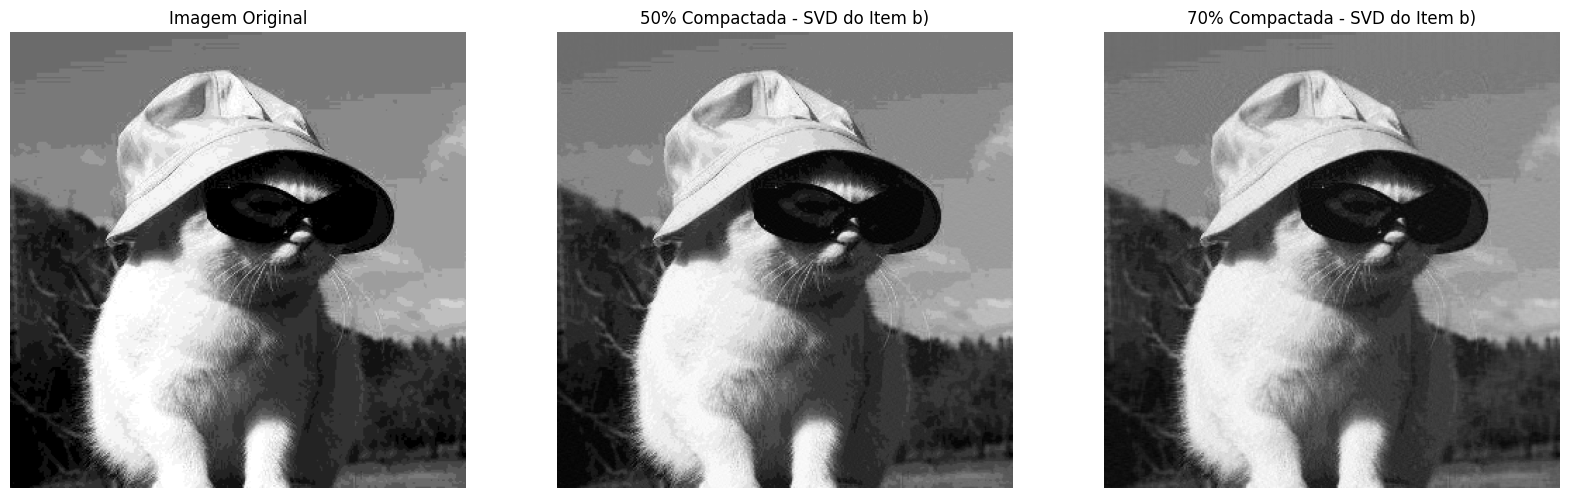

In [57]:
fig = plt.figure(figsize=(20,6),facecolor='white')

# Plotando a imagem orignial
fig.add_subplot(1, 3, 1)
plt.imshow(img, cmap='grey')
plt.title('Imagem Original')
plt.axis('off')

# Aplicando a decomposição SVD (do item b) na imagem
U, S, V = svd(img)
S = np.diag(S)

# Compactando a imagem em 50%
k = int(k_original * 0.50)
img_compact = U[:, :k] @ S[:k, :k] @ V[:k, :]

# Imprimindo a imagem 50% compactada
fig.add_subplot(1, 3, 2)
plt.imshow(img_compact, cmap='grey')
plt.title('50% Compactada - SVD do Item b)')
plt.axis('off')

# Compactando a imagem em 70%
k = int(k_original * 0.30)
img_compact = U[:, :k] @ S[:k, :k] @ V[:k, :]

# Imprimindo a imagem 70% compactada
fig.add_subplot(1, 3, 3)
plt.imshow(img_compact, cmap='grey')
plt.title('70% Compactada - SVD do Item b)')
plt.axis('off')
plt.show()

Os códigos acima apenas utilizam os métodos anteriormente implementados para a aplicação enunciada, estando pouco relacionados com a teorida desenvolvida, portanto está célula se limita a comentar os resultados obtidos.

Como é perceptível pelos *plot's*, ambos os métodos realizam a compactação da imagem através da *Decomposição SVD* de forma satisfatória, gerando imagens muito próximas e um processo gradativo de compactação registrado em ambas as células de código. Através dessa análise é possível constatar que a implementação das funções *svd* e *francis* dos itens a) e b), respectivamente, foi satisfatória em termos de corretude, e não apresentaram diferença significativa em relação à implementação da biblioteca *numpy.linalg*.

Destaca-se contudo, que o desempenho das funções pré-implementadas pela biblioteca nativa da linguagem são significativamente mais eficientes, tendo sua célula executada em um tempo de 1 a 2 segundos, enquanto a implementação dos itens a) e b) levou em torno de 11 segundos.

## 2) Interpolação - Para a função $$f(t) = \frac{1}{1+25t^2}$$ no intervalo $[-1, 1]$ faça:

### 2. a) Implemente a interpolação de Lagrange e de Newton.

In [58]:
def lagrange_interp(xi, yi, x):
    # Obtendo os dados de dimensionalidade dos vetores
    n, m = xi.size, x.size
    if n == 1:
        xi = xi.T 
        yi = yi.T
        x  = x.T
        n = m

    # Calculando os polinômios de Lagrange
    L = np.ones((n, len(x)))
    for i in range(n):
        for j in range(n):
            if i != j:
                L[i, :] *= (x - xi[j]) / (xi[i] - xi[j])

    # Calculando os valores interpolados da função
    y = np.dot(yi, L)
    return y

def newton_interp(xi, yi, x):
    # Obtendo os dados de dimensionalidade dos vetores
    n, m = xi.size, x.size
    if n == 1:
        xi = xi.T 
        yi = yi.T 
        x  = x.T
        n  = m

    # Inicializando os dados necessários
    ni = x.size
    N = np.ones((n, ni))
    D = np.zeros((n, n))
    D[:, 0] = yi

    # Obtendo a matriz D conforme o método de Newton
    for j in range(1, n):
        for i in range(n - j):
            D[i, j] = (D[i+1, j-1] - D[i, j-1]) / (xi[i+j] - xi[i])
    
    # Obtendo o polinômio interpolador
    for i in range(1, n):
        N[i, :] = N[i-1, :] * (x - xi[i-1])

    # Calculando os valores interpolados da função
    y = np.dot(D[0, :], N)
    return y

Os métodos acima utilizam técnicas diferentes para executar a *interpoalção polinomial* de determinada função, ou seja, encontrar um polinômio que passe por um conjunto de pontos e, através deles, aproxime a função passada como parâmetro.

Na implementação relativa ao *Método de Lagrange*, é construido um polinômio para cada ponto fornecido à função através de uma série de cálculos realizados na matriz $L$ (conforme indicado abaixo). Dessa forma, os valores interpolados são obtidos através do produto entre os valores da função relativos à cada ponto e seus respectivos polinômios.

Polinômios de Lagrange: $$ l_i(x) = \prod_{j=0, j \neq i}^{n} \frac{x - x_j}{x_i - x_j} $$

Polinômio Interpolador: $$ L(x) = \sum_{i=0}^{n} y_i \cdot l_i(x) $$ 

Já no caso do *Método de Newton*, a matriz $D$ (matriz de diferenças divididas) é utilizada para calcular os coeficientes do polinômio, de tal forma que os elementos (diferenças) de ordem superior são utilizados para calcular os elementos posteriores conforme mostrado abaixo:

Polinômio interpolador: $$ P(x) = a_0 + a_1(x-x_0) + a_2(x-x_0)(x-x_1) + \ldots + a_n(x-x_0)(x-x_1) \ldots (x-x_{n-1}) $$

Coeficientes do polinômio: $$ a_k = f[x_i, x_{i+1}, \ldots, x_{i+k}] = \frac{f[x_{i+1}, x_{i+2}, \ldots, x_{i+k}] - f[x_i, x_{i+1}, \ldots, x_{i+k-1}]}{x_{i+k} - x_i} $$

Feito esse processo, o polinômio é obtido conforme indicado acima, e os valores interpolados são calculados como o produto entre os valores de $x$ (primeira linha da matriz $D$) e o *polinômio interpolador*.

### 2. b) Usando 11 pontos igualmente espaçados dentro do intervalo dado, calcule as interpolações de Lagrange e Newton com o código implementado no item anterior. Mostre os resultados em dois gráficos separados. Que resultado teórico justifica o fato das duas soluções serem iguais?

In [59]:
# Função original
def f(x):
    return 1 / (1 + 25 * x**2)

# Comportamento da função original (analisado em 100 pontos)
xs = np.linspace(-1, 1, num=100, endpoint=True)
ys = [f(x) for x in xs]

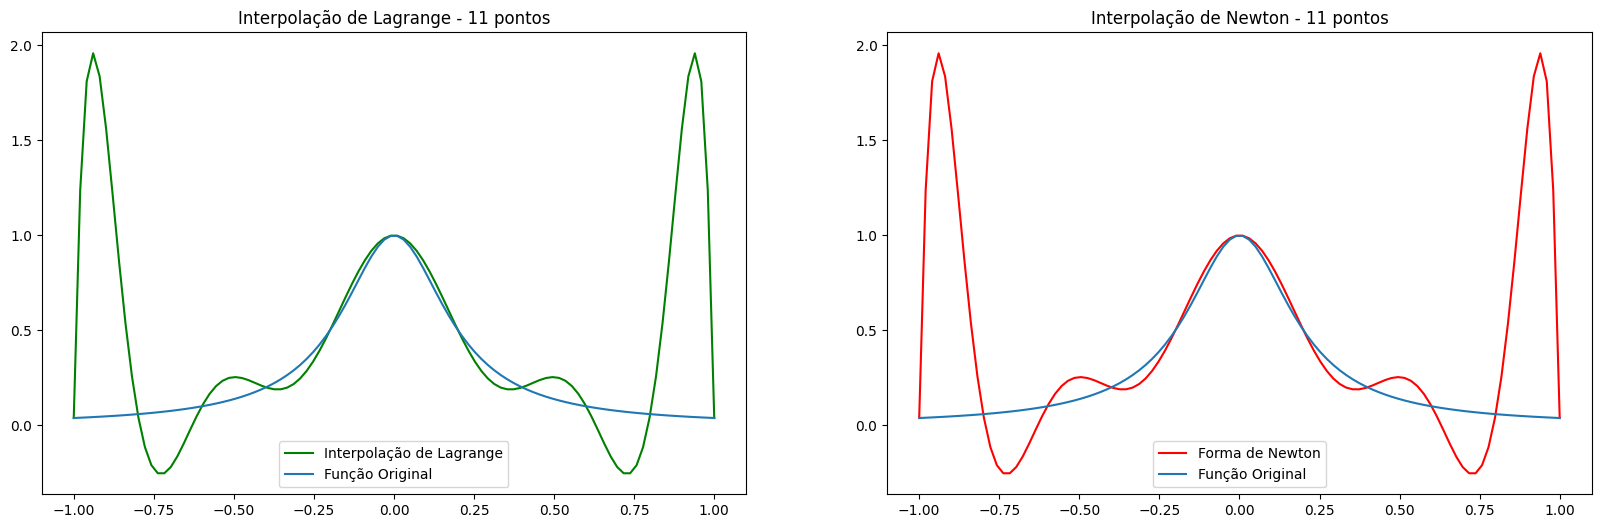

In [60]:
# Inicializando os 11 pontos igualmente espaçados no intervalo descrito
xi = np.linspace(-1, 1, num=11, endpoint=True)
yi = [f(x) for x in xi]

# Obtendo os valores interpolados
y_lagrange = lagrange_interp(xi, yi, xs)
y_newton   = newton_interp(xi, yi, xs)

fig = plt.figure(figsize=(20,6),facecolor='white')

# Plotando a interpolação de Lagrange
fig.add_subplot(1, 2, 1)
plt.plot(xs, y_lagrange, label='Interpolação de Lagrange', color='g')
plt.plot(xs, ys, label='Função Original')
plt.title('Interpolação de Lagrange - 11 pontos')
plt.legend()

# Plotando a interpolação de Newton
fig.add_subplot(1, 2, 2)
plt.plot(xs, y_newton, label='Forma de Newton', color='r')
plt.plot(xs, ys, label='Função Original')
plt.title('Interpolação de Newton - 11 pontos')
plt.legend()

plt.show()

O fato que justifica a igualdade das soluções obtidas com o código acima é o fator de unicidade do polinômio de interpolação. É definido por teorema que, para $(n + 1)$ pontos representados por pares ordenados $(x0, y0) < (xi, yi) < (xn, yn)$ de uma função, existe um único polinômio interpolador dos pontos.

Ou seja, embora os métodos de *Lagrange* e *Newton* utilizem diferentes técnicas para obter o polinômio, existe apenas um polinômio interpolador da função $f(x)$ para os pontos mencionados. Dessa forma, ambos os métodos convergem para o único, e portanto mesmo resultado, fazendo com que a função representada no *plot* seja igual.

### 2. c) Repita o processo com 21 pontos. O que acontece? Exiba o gráfico das soluções comparando com a exata.

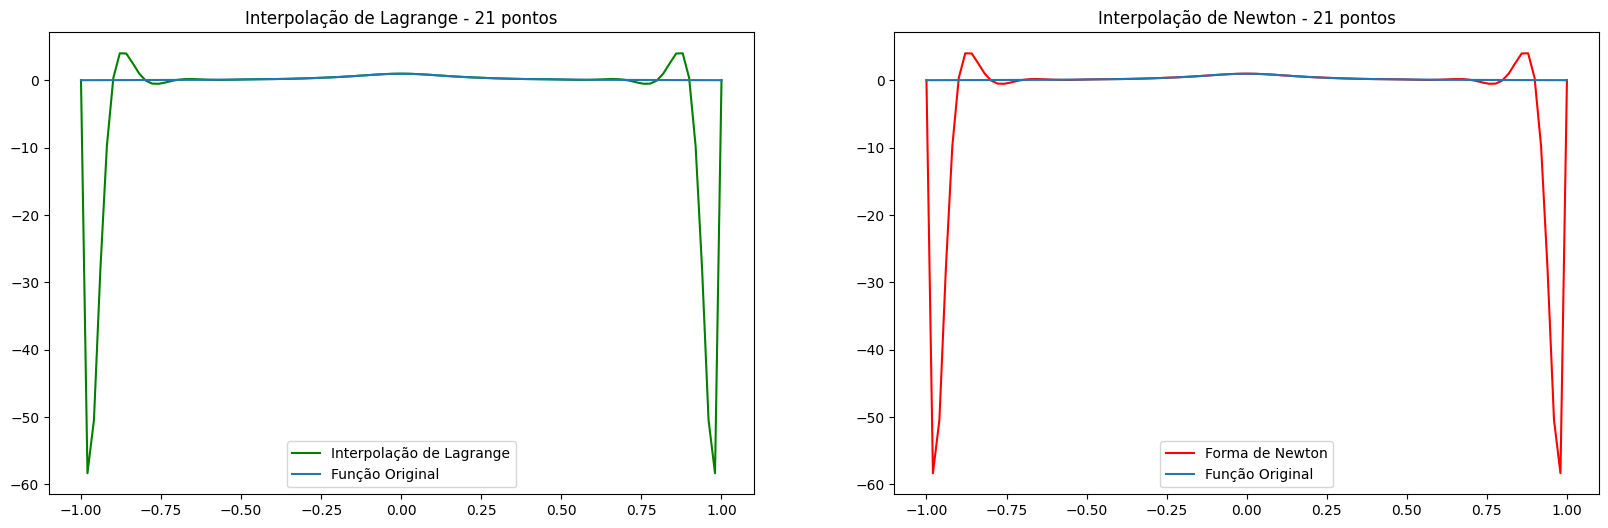

In [61]:
# Inicializando os 21 pontos igualmente espaçados no intervalo descrito
xi = np.linspace(-1, 1, num=21, endpoint=True)
yi = [f(x) for x in xi]

# Obtendo os valores interpolados
y_lagrange = lagrange_interp(xi, yi, xs)
y_newton   = newton_interp(xi, yi, xs)

fig = plt.figure(figsize=(20,6),facecolor='white')

# Plotando a interpolação de Lagrange
fig.add_subplot(1, 2, 1)
plt.plot(xs, y_lagrange, label='Interpolação de Lagrange', color='g')
plt.plot(xs, ys, label='Função Original')
plt.title('Interpolação de Lagrange - 21 pontos')
plt.legend()

# Plotando a interpolação de Newton
fig.add_subplot(1, 2, 2)
plt.plot(xs, y_newton, label='Forma de Newton', color='r')
plt.plot(xs, ys, label='Função Original')
plt.title('Interpolação de Newton - 21 pontos')
plt.legend()

plt.show()

Utilizando 21 pontos de interpolação, é possível constatar uma melhora na aproximação da função nos pontos intermediários, em contraponto à piora na aproximação quando analisados os pontos mais extremos do intervalo.

Primeiramente, vale destacar que o um polinômio de interpolação de grau $n$ é proveniente de uma interpolação com $(n + 1)$ nós de interpolação. Dessa forma, ao utilizar 21 pontos obtemos um polinômio de grau 20, e com 11 pontos obtemos um polinômio de grau 10. Nesse contexto, polinômios de maior grau tendem a aproximar determinada função com maior precisão, o que justifica a melhora na aproximação nos valores intermediarios do intervalo no caso do item c).

Por outro lado, a piora na precisão dos métodos ao utilizar 21 pontos é justificado pelo *Fenômeno de Runge*, o qual determina que, graças a instabilidade de polinômios de ordem elevada, a interpolação gerada por um grande número de pontos igualmente espaçados no intervalo analisado pode introduzir grandes oscilações na interpolação, fazendo com que a precisão da aproximação seja fortemente prejudicada nos extremos do intervalo analisado.

### 2. d) Usando a função scipy.interpolate.interp1d calcule a interpolação usando spline linear e cúbica. Exiba os gráficos e comente as diferenças das soluções deste item para os anteriores.

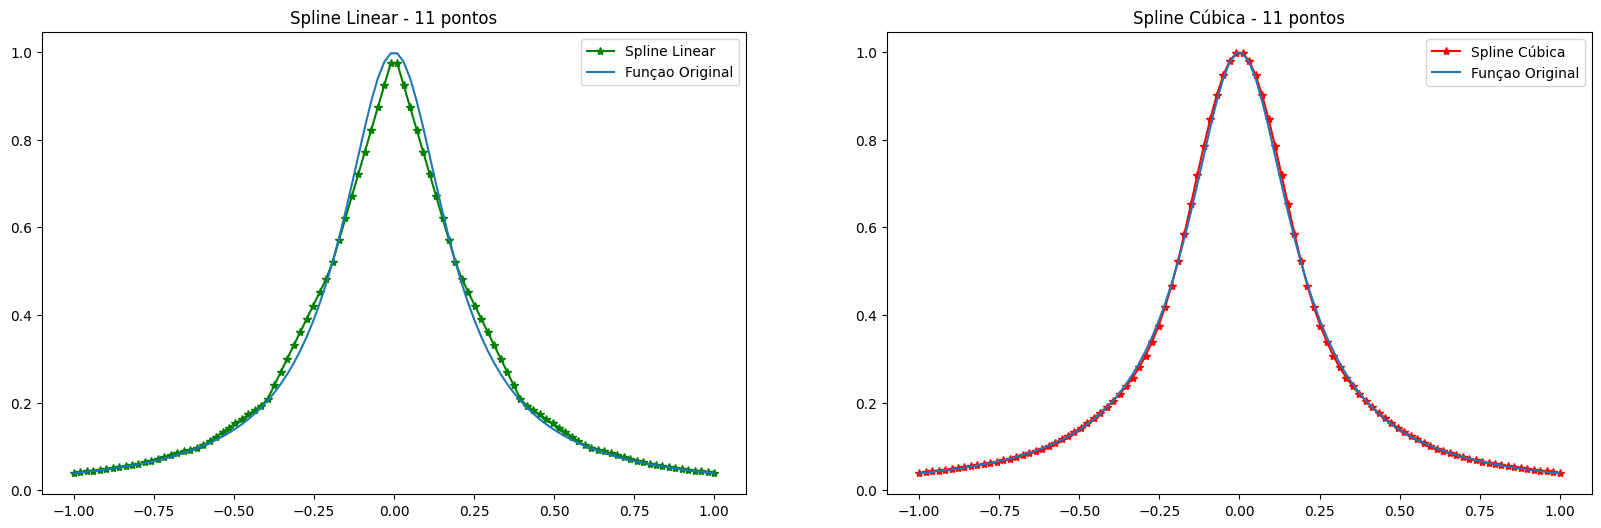

In [62]:
# Inicializando os 11 pontos igualmente espaçados no intervalo descrito
xi = np.linspace(-1, 1, num=11, endpoint=True)
yi = [f(x) for x in xi]

# Obtendo as Spline's
f_lin = scipy.interpolate.interp1d(xi, yi, kind='linear')
f_cub = scipy.interpolate.interp1d(xi, yi, kind='cubic')

# Obtendo os valores interpolados
y_linear = f_lin(xs)
y_cubica = f_cub(xs)

fig = plt.figure(figsize=(20,6),facecolor='white')

# Plotando a Spline linear
fig.add_subplot(1, 2, 1)
plt.plot(xs, y_linear, label='Spline Linear', color='g', marker='*')
plt.plot(xs, ys, label='Funçao Original')
plt.title('Spline Linear - 11 pontos')
plt.legend()

# Plotando a Spline Cúbica
fig.add_subplot(1, 2, 2)
plt.plot(xs, y_cubica, label='Spline Cúbica', color='r', marker='*')
plt.plot(xs, ys, label='Funçao Original')
plt.title('Spline Cúbica - 11 pontos')
plt.legend()

plt.show()

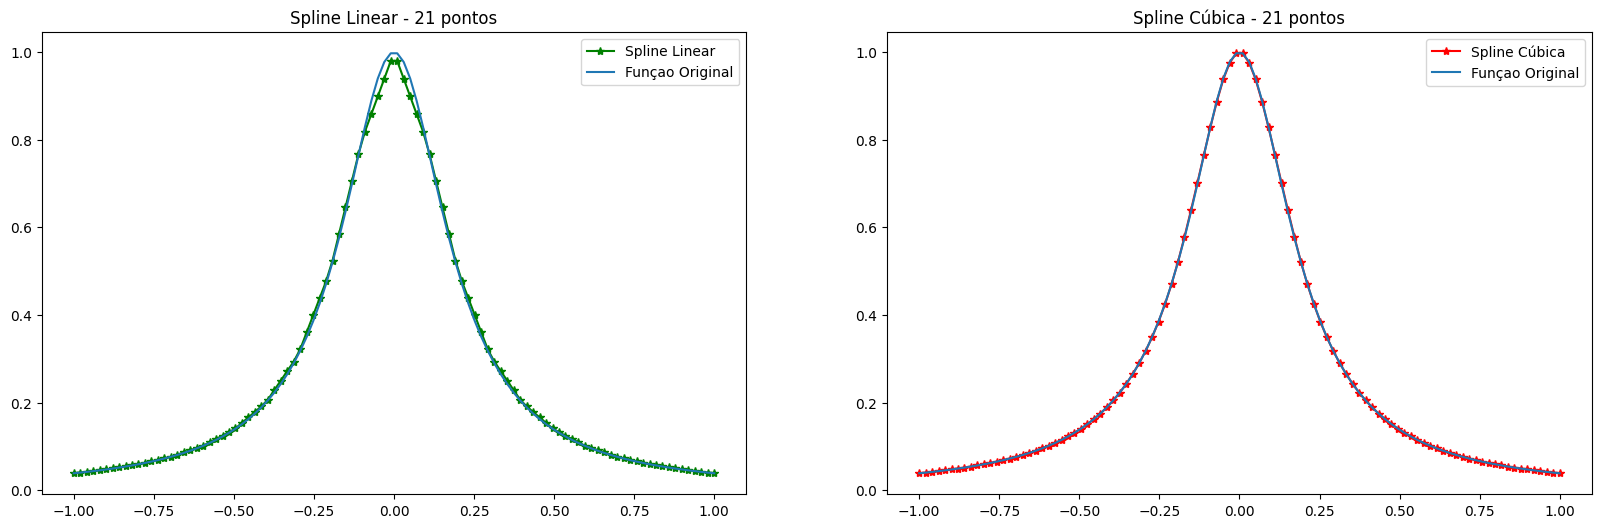

In [63]:
# Inicializando os 21 pontos igualmente espaçados no intervalo descrito
xi = np.linspace(-1, 1, num=21, endpoint=True)
yi = [f(x) for x in xi]

# Obtendo as Spline's
f_lin = scipy.interpolate.interp1d(xi, yi, kind='linear')
f_cub = scipy.interpolate.interp1d(xi, yi, kind='cubic')

# Obtendo os valores interpolados
y_linear = f_lin(xs)
y_cubica = f_cub(xs)

fig = plt.figure(figsize=(20,6),facecolor='white')

# Plotando a Spline linear
fig.add_subplot(1, 2, 1)
plt.plot(xs, y_linear, label='Spline Linear', color='g', marker='*')
plt.plot(xs, ys, label='Funçao Original')
plt.title('Spline Linear - 21 pontos')
plt.legend()

# Plotando a Spline Cúbica
fig.add_subplot(1, 2, 2)
plt.plot(xs, y_cubica, label='Spline Cúbica', color='r', marker='*')
plt.plot(xs, ys, label='Funçao Original')
plt.title('Spline Cúbica - 21 pontos')
plt.legend()

plt.show()

Uma *Spline* pode ser definida como uma função que pode ser particionada em diferentes polinômios que a descrevem no intervalo definido por dois pontos de interpolação consecutivos. *Spline's* são de classe $C^{k-1}$, em que k é o grau do polinômio.

Em termos de aproximação, nota-se uma melhora na aproximação quando utilizados os métodos de *Spline*, principalmente no caso da *Spline cúbica*. Isso se deve ao fato de que tais métodos apresentam um resultado perceptivelmente melhor do que os métodos de *Lagrange* e *Newton* quando os dados de amostragem são mais volumosos. 

Finalmente, como visto anteriormente, os métodos de *Lagrange* e *Newton* apresentam uma piora significativa na aproximação dos extremos do intervalo analisado, a *Spline Linear* apresenta uma sutil piora nos pontos de maior inclinação da função, e a *Spline Cúbica* não demonstrou piora notável.

### 2. e)
Repita os itens b) e c) com nós de Chebishev

In [64]:
# Definindo os nós de Chebyshev
def chebyshev(n, a, b):
    return ((a + b) / 2) + ((b - a) / 2) * np.cos(((2 * np.arange(n) + 1) * np.pi) / (2 * n))

a = 1
b = -1

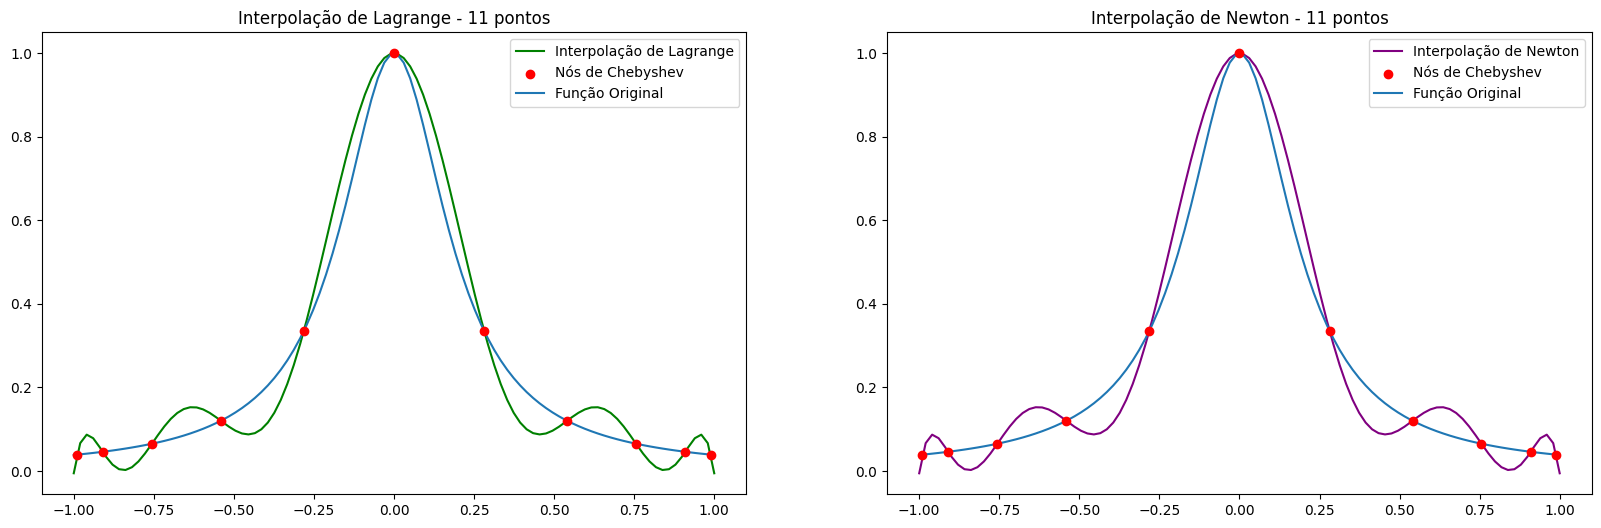

In [65]:
n  = 11

# Definindo os 11 pontos gerados pelos nós de Chebyshev
xi = chebyshev(n, a, b)
yi = [f(x) for x in xi]

# Obtendo os valores interpolados
y_lagrange = lagrange_interp(xi, yi, xs)
y_newton   = newton_interp(xi, yi, xs)

fig = plt.figure(figsize=(20,6),facecolor='white')

# Plotando a interpolação de Lagrange
fig.add_subplot(1, 2, 1)
plt.plot(xs, y_lagrange, label='Interpolação de Lagrange', color='g')
plt.scatter(xi, yi, label='Nós de Chebyshev', color='r', zorder=3)
plt.plot(xs, ys, label='Função Original')
plt.title('Interpolação de Lagrange - 11 pontos')
plt.legend()

# Plotando a interpolação de Newton
fig.add_subplot(1, 2, 2)
plt.plot(xs, y_newton, label='Interpolação de Newton', color='purple')
plt.scatter(xi, yi, label='Nós de Chebyshev', color='r', zorder=3)
plt.plot(xs, ys, label='Função Original')
plt.title('Interpolação de Newton - 11 pontos')
plt.legend()

plt.show()

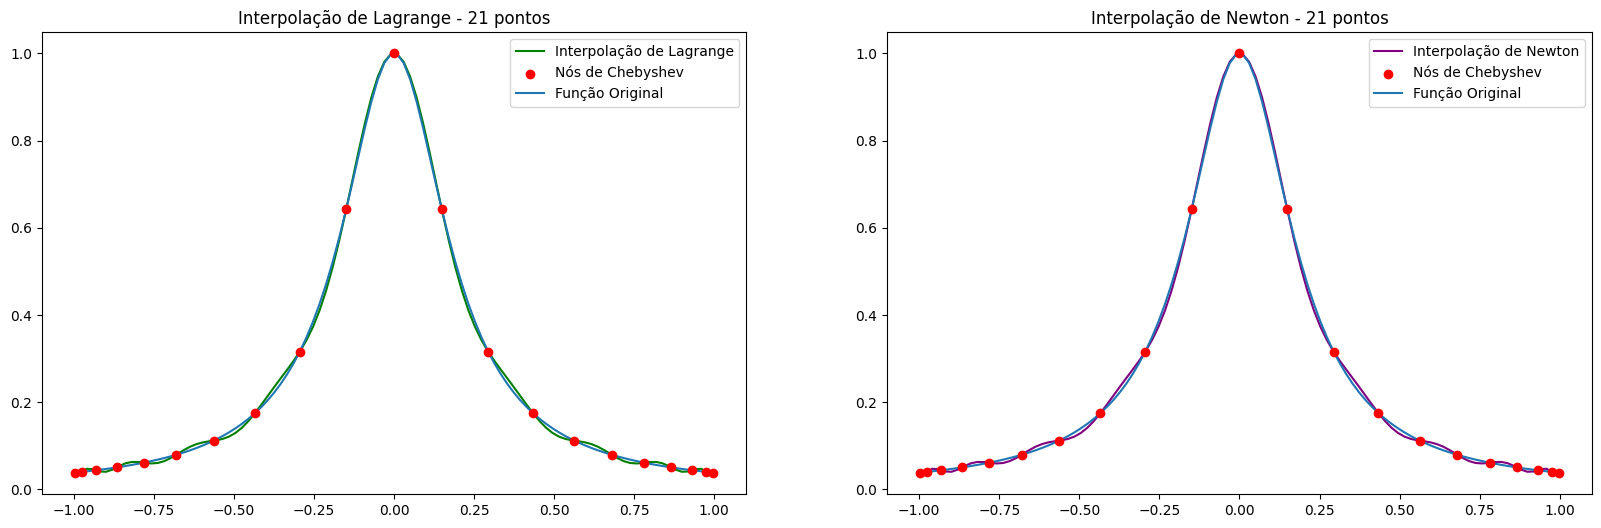

In [66]:
n  = 21

# Definindo os 21 pontos gerados pelos nós de Chebyshev
xi = chebyshev(n, a, b)
yi = [f(x) for x in xi]

# Obtendo os valores interpolados
y_lagrange = lagrange_interp(xi, yi, xs)
y_newton   = newton_interp(xi, yi, xs)

fig = plt.figure(figsize=(20,6),facecolor='white')

# Plotando a interpolação de Lagrange
fig.add_subplot(1, 2, 1)
plt.plot(xs, y_lagrange, label='Interpolação de Lagrange', color='g')
plt.scatter(xi, yi, label='Nós de Chebyshev', color='r', zorder=3)
plt.plot(xs, ys, label='Função Original')
plt.title('Interpolação de Lagrange - 21 pontos')
plt.legend()

# Plotando a interpolação de Newton
fig.add_subplot(1, 2, 2)
plt.plot(xs, y_newton, label='Interpolação de Newton', color='purple')
plt.scatter(xi, yi, label='Nós de Chebyshev', color='r', zorder=3)
plt.plot(xs, ys, label='Função Original')
plt.title('Interpolação de Newton - 21 pontos')
plt.legend()

plt.show()

*Nós de Chebyshev* são pontos definidos dentro do intervalo de interpolação, os quais são utilizados como forma de diminuir o erro de interpolação e consequentemente melhorar a aproximação da função analisada. Os *Nós de Chebyshev* são distribuídos uniformemente ao longo do intervalo e calculados conforme indicado abaixo. Tais propriedades fazem com que os nós se concentrem nos extremos do intervalo, reduzindo as perturbações observadas no polinômio interpolador, tornando a aproximação consideravelmente mais precisa.

*Nós de Chebyshev*:
$$ x_i = \frac{a + b}{2} + \frac{b - a}{2} \cos \left( \frac{2i + 1}{2(n + 1)} \pi \right), \quad i = 0, \ldots, n $$

Analisando os resultados obtidos através do *plot* das funções, é perceptível que a utilização dos *Nós de Chebyshev* melhora significativamente a aproximação da função. Isso se deve principalmente ao fato de que as oscilações do polinômio nos extremos da função foram drasticamente reduzidas, fazendo com que a curva gerada pelo polinômio interpolador se ajuste muito melhor ao comportamento da função enunciada.

Ademais, a concentração dos nós nos extremos do intervalo fazem com que, para um maior número de pontos, a função apresente oscilações menos intensas, o oposto do que é observado ao simplesmente ampliar o número de pontos analisados (vide explicações dos itens b e c). Ou seja, a utilização de *Nós de Chebyshev*, ao reduzir o erro de aproximação, balanceia as oscilações nos extremos do intervalo, ajusta a aproximação e reduz drasticamente a instabilidade do polinômio interpolador. 

## 3) Mínimos Quadrados

In [67]:
def mmq(x, y, k):
    X = np.vander(x, k)
    A = np.transpose(X).dot(X)
    b = np.transpose(X).dot(y)
    a = la.solve(A, b)
    return a

def mmq_qr(x, y, k):
    X = np.vander(x, k)
    [Q, R] = la.qr(X)
    b = np.transpose(Q).dot(y)
    a = la.solve(R, b)
    return a

### 3. a) Explique cada um dos códigos dados acima. O que está sendo calculado ?

Ambos os códigos implementam o método dos mínimos quadrados, ou seja, calculam os coeficientes do polinômio $P(x)$ que aproxima uma função $f(x)$ de tal modo que o erro quadrático entre os valores ajustados e os valores observados $(P(xi) - f(xi))²$ seja mínimo. Todavia, cada função realiza o procedimento de maneira diferente em relação a outra.

A interpolação matricial do método se dá como descrito abaixo:

\begin{array}{cc}
\begin{pmatrix}
<u_0, u_0> & <u_0, u_1> & \ldots & <u_0, u_n> \\
<u_1, u_0> & <u_1, u_1> & \ldots & <u_1, u_n> \\
\vdots & \vdots & \ddots & \vdots \\
<u_n, u_0> & <u_n, u_1> & \ldots & <u_n, u_n> \\
\end{pmatrix}
&
\begin{pmatrix}
a_0 \\
a_1 \\
\vdots \\
a_n \\
\end{pmatrix}
=
\begin{pmatrix}
<y_0, y> \\
<y_1, y> \\
\vdots \\
<y_n, y> \\
\end{pmatrix}
\end{array}

Em que:
- A matriz à esquerda é o produto interno entre a *matriz de Vandermond* e sua transposta;
- O vetor dos coeficientes *$a_i$* representa os coeficientes do polinômio a serem calculados;
- A matriz à direita é o produto interno entre a *matriz de Vandermond* e os dados (eixo $y$ da função).
 
No primeiro caso (mmq):

Essa implementação resolve o problema ao decompor as matrizes quadradas através de operações com a *matriz de Vandermond* e sua transposta, como indicado abaixo:

\begin{array}{cc}
\begin{pmatrix}
1 & 1 & ... & 1 \\
x_0 & x_1 & ... & x_n \\
... & ... & ... & ... \\
x_0^{m} & x_1^{m} & ... & x_n^{m} \\
\end{pmatrix}
&
\begin{pmatrix}
1 & 1 & ... & 1 \\
x_0 & x_1 & ... & x_n \\
... & ... & ... & ... \\
x_0^{m} & x_1^{m} & ... & x_n^{m} \\
\end{pmatrix}
=
\begin{pmatrix}
1 & 1 & ... & 1 \\
x_0 & x_1 & ... & x_n \\
... & ... & ... & ... \\
x_0^{m} & x_1^{m} & ... & x_n^{m} \\
\end{pmatrix}
&
\begin{pmatrix}
y_0 \\ 
y_1 \\
... \\
y_n \\
\end{pmatrix}
\end{array}

Dessa forma, o procedimento se dá através dos seguintes passos:

- Obtém-se a *matriz de Vandermond* $X$, matriz das potências sucessivas de cada elemento do vetor;
- É calculada a matriz do sistema normal $A$, equivalente a $X^{T}X$, em que $X$ é a *matriz de Vandermond* (lado esquerdo da equação);
- Calcula-se o vetor $b$, correspondente ao lado direito da equação, produto da *matriz de Vandermond* com os dados da função original;
- Finalmente, o sistema é resolvido, afim de obter os coeficientes $a_i$ do polinômio. 

No segundo caso (*mmq_qr*), por sua vez, resolve o problema de maneira estruturalmente similar, alterando somente a *matriz de Vandermond* $X$, que agora é decomposta no produto das matrizes $Q, R$, obtidas através da *decomposição QR*. A equação se dá como mostrado abaixo:

\begin{align*}
X^{T}Xa &= X^{T}y \\
(QR)^{T}(QR)a &= (QR)^{T}y \\
R^{T}(Q^{T}Q)Ra &= R^{T}Q^{T}y \\
Ra &= Q^{T}y
\end{align*}

Assim, os passos da função podem ser descritos como:

- Obtém-se a *matriz de Vandermond* $X$, matriz das potências sucessivas de cada elemento do vetor;
- É calculada a *decomposição QR* da matriz $X$;
- Calcula-se o vetor $b$, correspondente ao lado direito da equação, produto da matriz $Q$ com os dados observados (eixo $y$ da função real);
- Finalmente, o sistema é resolvido, afim de obter os coeficientes $a_i$ do polinômio. 


### 3 b) Aproxime, no sentido dos mínimos quadrados, os dados do período completo, de 26 de fevereiro de 2020 a 18 de junho de 2020, por uma função $g(x) = ab^x$, com $a, b ∈ R$. Use um dos códigos dados acima.

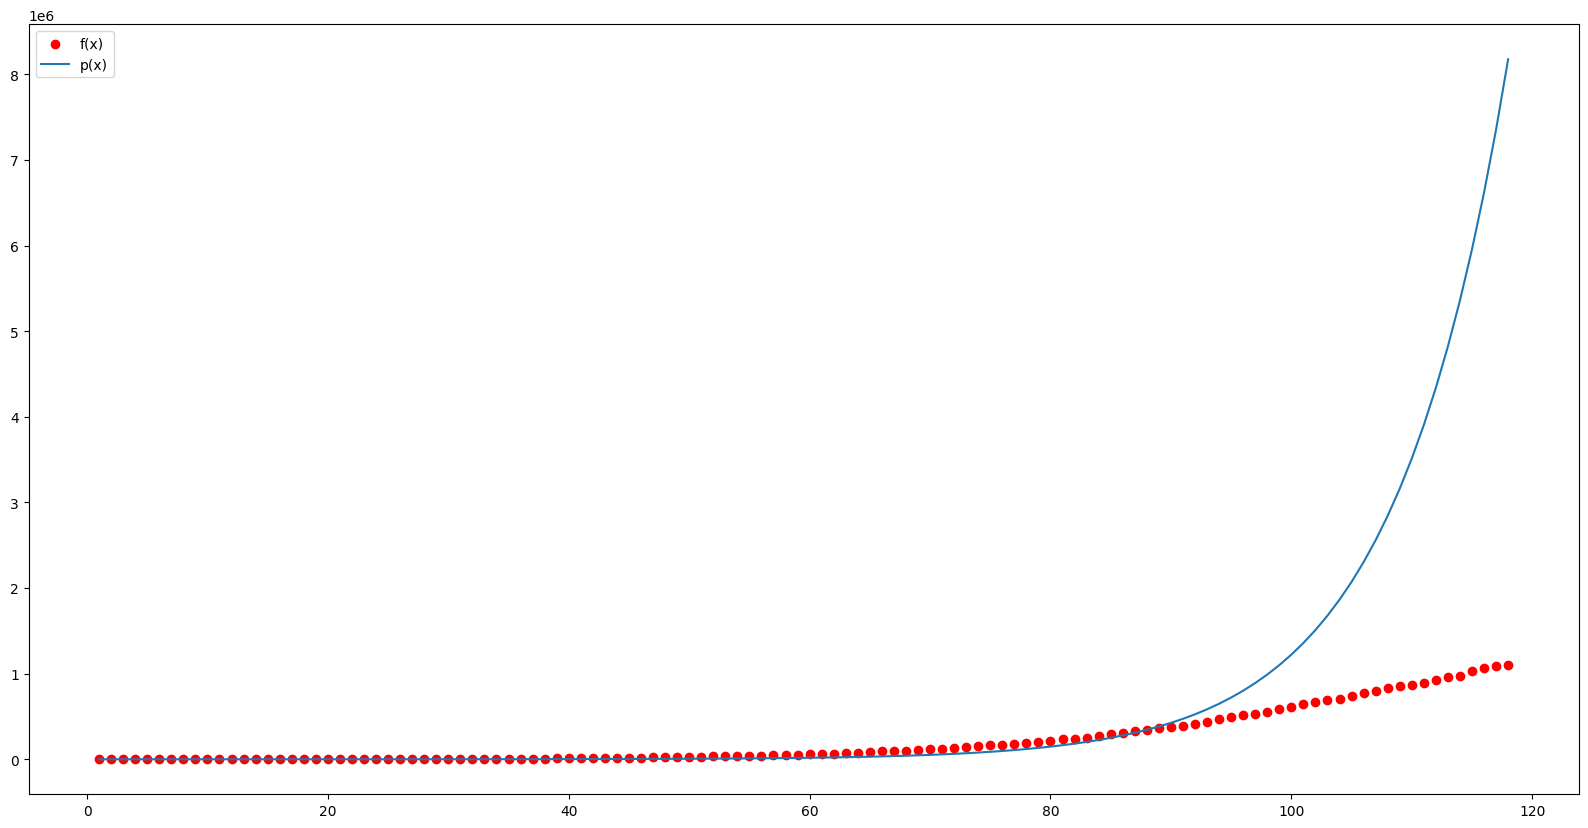

In [68]:
# Carregando os dados
casos = np.loadtxt('casosacumuladosbrasilatuaizado.txt')

# Definindo os pontos relativos a cada registro dos dados
xi = np.arange(1, len(casos) + 1)
yi = casos

# Ajustando os dados pra escala logarítmica 
yi_log = np.log(yi)

# Aplicando o método MMQ nos dados e obtendo o polinômio para a aproximação
a = mmq(xi, yi_log, 2)
p = lambda x: a[1] + a[0] * x

# Plotando os resultados
plt.figure(figsize=(20,10),facecolor='white')
plt.scatter(xi, yi, label='f(x)', color='r')
plt.plot(xi, np.exp(p(xi)), label='p(x)') 
plt.legend()
plt.show()

O código acima utiliza o *Método dos Mínimos Quadrados* para aproximar a função $f(x)$, a qual é modelada por uma série discreta de pares $(x, y)$ em que $x$ é um dia dentro do período analisado e $y$ o número acumado de casos registrados até o dia $x$.

Como deseja-se aproximar a função através de um modelo exponencial, os dados são normalizados em escala logarítmica antes que o método seja aplicado. O *Método dos Mínimos Quadrados* é então evocado para os dados já normalizados, e os coeficientes $a_i$ são utilizados para modelar a função $P(x)$, que aproxima os dados.

Em termos de resultado, a aproximação se mostra muito correta em grande parte dos dados, exibindo no gráfico uma função $P(x)$ bastante ajustada até o 90º dia do conjunto de dados. Todavia, devido a natureza da função exponencial e a propagação de erro no *Método dos Mínimos Quadrados*, os dados relativos ao fim do intervalo (90º ao 120º dia) não são bem aproximados, uma vez que a função $P(x)$ cresce demasiadamente. Este aspecto será explicado em mais detalhes no item e).

### 3. c) Repita o ítem b) usando apenas os 20 primeiros dias.

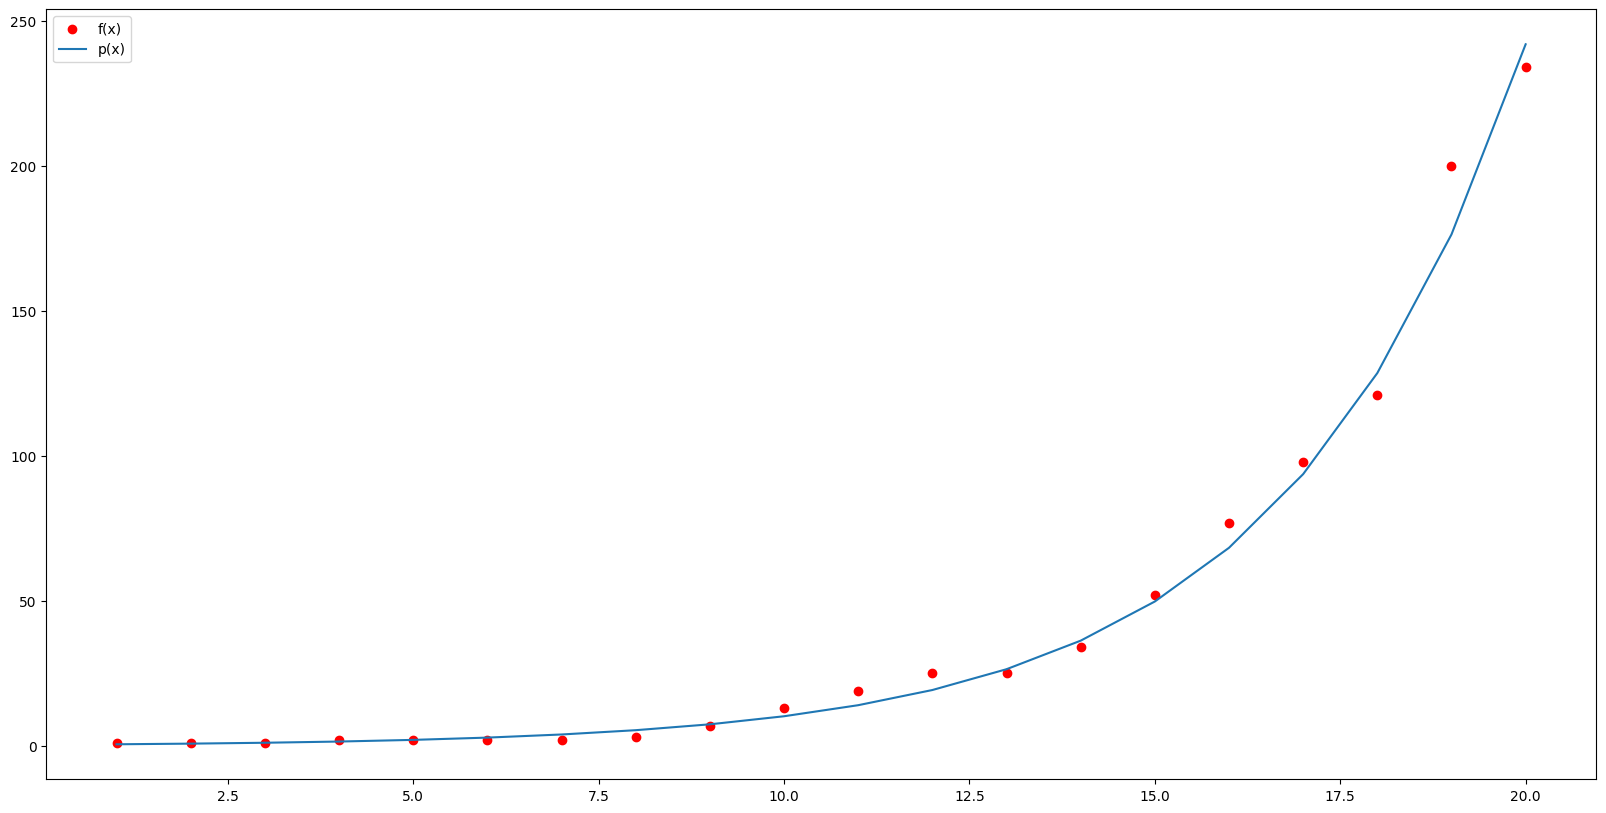

In [69]:
# Carregando os dados
casos = np.loadtxt('casosacumuladosbrasilatuaizado.txt')

# Definindo os 20 primeiros pontos relativos a cada registro dos dados
xi = np.arange(1, 21)
yi = casos[:20]

# Ajustando os dados pra escala logarítmica 
yi_log = np.log(yi)

# Aplicando o método MMQ nos dados e obtendo o polinômio para a aproximação
a = mmq(xi, yi_log, 2)
p = lambda x: a[1] + a[0] * x

# Plotando os resultados
plt.figure(figsize=(20,10),facecolor='white')
plt.scatter(xi, yi, label='f(x)', color='r')
plt.plot(xi, np.exp(p(xi)), label='p(x)') 
plt.legend()
plt.show()

### 3. d) Repita o ítem b) usando apenas os 50 últimos dias.

Nesta célula é realizado o mesmo procedimento anterior, porém com o espaço amostral reduzido para os primeiros 20 dias registrados. Como esperado pela justificativa anterior, foi constatada uma aproximação muito mais precisa, uma vez que o crescimento da função exposnencial não se mostra tão vertiginoso em um intervalo reduzido, segue ainda que a propagação de erro do método empregado é consideravelmente reduzida ao passo que o mesmo é ajustado em um menor intervalo, gerando uma aproximação mais satisfatória.

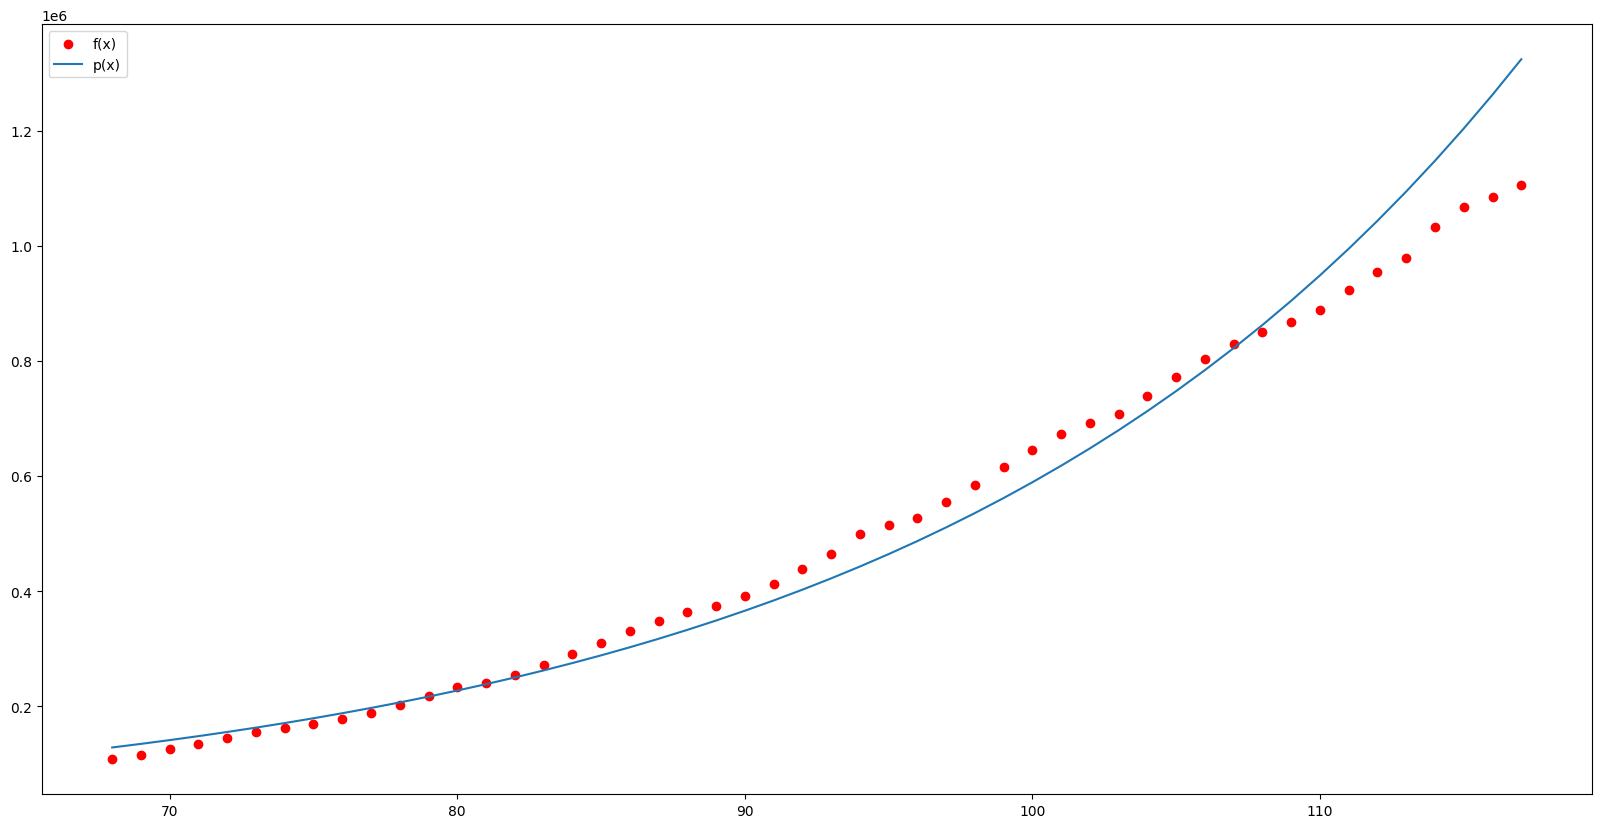

In [70]:
# Carregando os dados
casos = np.loadtxt('casosacumuladosbrasilatuaizado.txt')

# Definindo os 50 ultimos pontos relativos a cada registro dos dados
inicio, fim = len(casos) - 50, len(casos)
xi = np.arange(inicio, fim)
yi = casos[inicio:fim]

# Ajustando os dados pra escala logarítmica 
yi_log = np.log(yi)

# Aplicando o método MMQ nos dados e obtendo o polinômio para a aproximação
a = mmq(xi, yi_log, 2)
p = lambda x: a[1] + a[0] * x

# Plotando os resultados
plt.figure(figsize=(20,10),facecolor='white')
plt.scatter(xi, yi, label='f(x)', color='r')
plt.plot(xi, np.exp(p(xi)), label='p(x)') 
plt.legend()
plt.show()

Assim como no item antearior, percebe-se uma melhora na corretude da função se comparada ao espaço amostral completo. Contudo, uma piora sutil pode ser observada quando comparada com o exemplo anterior (primeiros 20 dias). 

Esta piora pode ser justificada tanto pela natureza da função exponencial, que tende a crescer de forma mais intensa conforme crescem os valores no eixo $x$, como também pelo fato de que o *Método dos Mínimos Quadrados* tende a apresentar um erro maior para intervalos maiores, e neste caso o intervalo contempla 30 dias a mais.

### e) Compare os ítens b), c) e d). Que tipo de informação os dados nos fornecem ?

Analisando cada um dos itens, é perceptível que para intervalos mais ajustados (itens b e c), a aproximação pelo método dos mínimos quadrados apresenta melhores resultados. Em contraponto, ao analisarmos todo o intervalo, é notável que os resultados não são satisfatórios para valores suficientemente próximos do fim do intervalo.

Primeiramente, deve-se notar que funções exponenciais apresentam um crescimento muito vertiginoso para grandes valores no eixo $x$. Dessa forma, é esperado que a precisão da aproximação decaia ao longo do intervalo, quando este é suficientemente grande. Tal efeito é observado no item b), onde é perceptível que a partir do dia 90 (aproximandamente) $P(x)$ cresce demasiadamente, se afastanto demais da função real.

Neste contexto, funções exponenciais tendem a se comportar melhor em intervalos menores, uma vez que os dados reais tendem a, em intervalos reduzidos e controlados, serem dispostos de uma forma mais linear. Essa disposição de dados é observada nos itens c) e d), condizendo com a melhora na precisão da aproximação de $P(x)$ nestas células.

Finalmente, vale destacar que, para o *Método dos Minimos Quadrados*, o erro pode se acumular ao longo do intervalo analisado, gerando uma perda de precisão conforme observamos valores cada vez maiores no eixo $x$ da função. Este fator, somado à natureza da função exponencial analisada anteriormente, justifica a diferença de precisão em cada um dos itens.